In [1]:
import scipy
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import tensorflow as tf

import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

%matplotlib inline 

In [2]:
tf.random.set_seed(456)

In [3]:
dataframe = pd.read_csv("AAPL_5Y.csv",parse_dates = ['Date'],index_col = 'Date')

print("size: ",dataframe.shape)

# To display the top 10 rows
dataframe.head(10)

size:  (1136, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-15,39.002499,39.162498,38.762501,38.924999,36.848984,104038800
2017-05-16,38.985001,39.014999,38.680000,38.867500,36.794552,80194000
2017-05-17,38.400002,38.642502,37.427502,37.562500,35.559155,203070800
2017-05-18,37.817501,38.334999,37.782501,38.134998,36.101105,134272800
2017-05-19,38.345001,38.494999,38.157501,38.264999,36.224186,107843200
2017-05-22,38.500000,38.645000,38.227501,38.497501,36.444283,91865600
2017-05-23,38.724998,38.724998,38.327499,38.450001,36.399315,79675600
2017-05-24,38.459999,38.542500,38.167500,38.334999,36.290440,76712000
2017-05-25,38.432499,38.587502,38.257500,38.467499,36.415874,76942400


<function matplotlib.pyplot.show(close=None, block=None)>

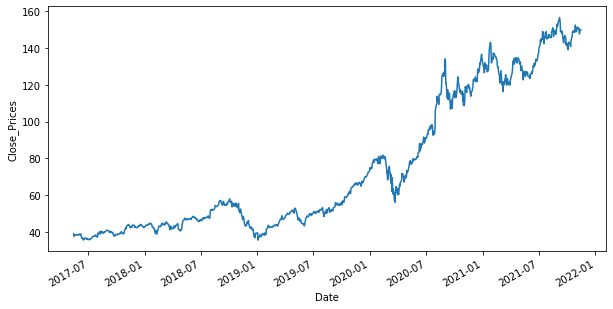

In [4]:
dataframe.Close.plot(figsize=(10,5))
plt.ylabel("Close_Prices")
plt.show

Dimension of train data:  (795, 6)
Dimension of test data:  (341, 6)


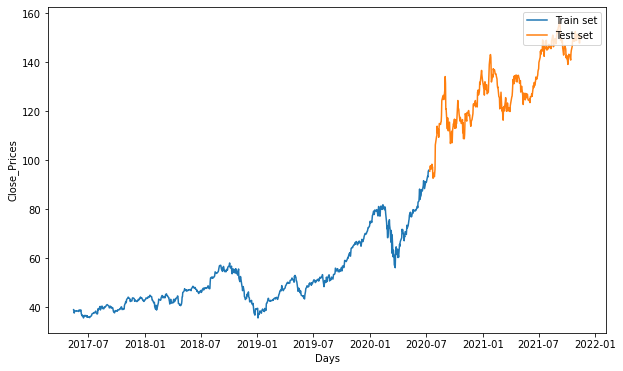

In [5]:
# Split train data and test data
training_size = int(len(dataframe)*0.7)
train_dataset, test_dataset = dataframe.iloc[:training_size], dataframe.iloc[training_size:]

# Plot train and test data
plt.figure(figsize = (10,6))
plt.plot(train_dataset.Close)
plt.plot(test_dataset.Close)
plt.xlabel('Days')
plt.ylabel('Close_Prices')
plt.legend(['Train set','Test set'], loc='upper right')

print('Dimension of train data: ', train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

In [6]:
#Split train data for X and Y
train_dataset = train_dataset.reset_index().drop('Date',axis = 1)

X_train = train_dataset.drop(['Close','Adj Close'], axis = 1)
Y_train = train_dataset[['Close']]

#Split test data for X and Y
test_dataset = test_dataset.reset_index().drop('Date',axis = 1)

X_test = test_dataset.drop(['Close','Adj Close'], axis = 1)
Y_test = test_dataset[['Close']]

print(X_train)
print(Y_test)

          Open       High        Low     Volume
0    39.002499  39.162498  38.762501  104038800
1    38.985001  39.014999  38.680000   80194000
2    38.400002  38.642502  37.427502  203070800
3    37.817501  38.334999  37.782501  134272800
4    38.345001  38.494999  38.157501  107843200
..         ...        ...        ...        ...
790  92.500000  93.945000  92.467499  118655600
791  93.852501  94.654999  93.057503  112424400
792  94.180000  95.375000  94.089996  117092000
793  96.262497  96.317497  94.672501  125642800
794  95.334999  95.980003  94.705002   90257200

[795 rows x 4 columns]
          Close
0     95.477501
1     97.057503
2     97.724998
3     96.522499
4     96.327499
..          ...
336  150.809998
337  147.919998
338  147.869995
339  149.990005
340  150.000000

[341 rows x 1 columns]


In [7]:
#Different scaler for input and output
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

#FIt the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(Y_train)

#Apply the scaler to training data
X_train_normalize = input_scaler.transform(X_train)
Y_train_normalize = output_scaler.transform(Y_train)



#Different scaler for input and output
scaler_x_test = MinMaxScaler(feature_range = (0,1))
scaler_y_test = MinMaxScaler(feature_range = (0,1))

#FIt the scaler using available training data
input_scaler_test = scaler_x_test.fit(X_test)
output_scaler_test = scaler_y_test.fit(Y_test)

#Apply the scaler to test data
X_test_normalize = input_scaler_test.transform(X_test)
Y_test_normalize = output_scaler_test.transform(Y_test)



print('X_train_normalize.shape:', X_train_normalize.shape)
print('Y_train_normalize.shape:', Y_train_normalize.shape)
print('X_test_normalize.shape:', X_test_normalize.shape)
print('Y_test_normalize.shape:', Y_test_normalize.shape)

X_train_normalize.shape: (795, 4)
Y_train_normalize.shape: (795, 1)
X_test_normalize.shape: (341, 4)
Y_test_normalize.shape: (341, 1)


In [8]:
print('X_train_normalize:\n', X_train_normalize)
print('Y_train_normalize:\n', Y_train_normalize)
print('X_test_normalize:\n', X_test_normalize)
print('Y_test_normalize:\n', Y_test_normalize)

X_train_normalize:
 [[0.05414001 0.05439051 0.05510516 0.15375661]
 [0.05385097 0.05195019 0.05371168 0.09118201]
 [0.04418755 0.04578735 0.0325564  0.41364082]
 ...
 [0.96559988 0.98440672 0.98961226 0.1880114 ]
 [1.         1.         0.99945104 0.21045079]
 [0.98467895 0.99441628 1.         0.11759031]]
Y_train_normalize:
 [[5.59443152e-02]
 [5.49919113e-02]
 [3.33761083e-02]
 [4.28588700e-02]
 [4.50121849e-02]
 [4.88633094e-02]
 [4.80765273e-02]
 [4.61716533e-02]
 [4.83663613e-02]
 [4.72897286e-02]
 [4.75381861e-02]
 [4.37698974e-02]
 [4.55090834e-02]
 [5.49090756e-02]
 [4.86148022e-02]
 [5.07681171e-02]
 [5.45777989e-02]
 [5.30042678e-02]
 [2.81170746e-02]
 [1.33752791e-02]
 [1.82201839e-02]
 [1.22986465e-02]
 [8.69596300e-03]
 [3.31276674e-04]
 [1.71849443e-02]
 [1.16774696e-02]
 [1.52386939e-02]
 [1.42448970e-02]
 [1.69365034e-02]
 [1.50316956e-02]
 [6.37704284e-03]
 [1.50730721e-02]
 [6.16997836e-03]
 [7.57795392e-03]
 [5.42463897e-03]
 [7.86778788e-03]
 [2.23608442e-03]
 [8.24

In [9]:
# Create a 3D input 
def create_3D_dataset(X,Y, time_steps=1):
    X_dataset = []
    Y_dataset = []
    for i in range (len(X) - time_steps):
        V = X[i:i+time_steps,:]
        X_dataset.append(V)
        Y_dataset.append(Y[i+time_steps])
    return np.array(X_dataset), np.array(Y_dataset)

time_Steps = 30

X_test, Y_test = create_3D_dataset(X_test_normalize, Y_test_normalize, time_Steps)

X_train, Y_train = create_3D_dataset(X_train_normalize, Y_train_normalize, time_Steps)

print('X_train.shape:', X_train.shape)
print('Y_train.shape:', Y_train.shape)
print('X_test.shape', X_test.shape)
print('Y_test.shape', Y_test.shape)

X_train.shape: (765, 30, 4)
Y_train.shape: (765, 1)
X_test.shape (311, 30, 4)
Y_test.shape (311, 1)


In [10]:
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional


def create_LSTM_model(units):
    model = Sequential()
    model.add(LSTM(units = units, return_sequences=True,input_shape=[X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(LSTM(units=units))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    #Compile model
    model.compile(loss = 'mse', optimizer = 'adam')
    return model

LSTM_model = create_LSTM_model(64)

In [11]:
# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    #early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
    record = model.fit(X_train, Y_train, epochs = 200, validation_split = 0.2, batch_size = 64,
                      shuffle = False)
    return record


print("\n\nLSTM_record")
LSTM_record = fit_model(LSTM_model)



LSTM_record
Epoch 1/200
10/10 [==============================] - 5s 143ms/step - loss: 0.0060 - val_loss: 0.0340
Epoch 2/200
10/10 [==============================] - 0s 46ms/step - loss: 0.0027 - val_loss: 0.0099
Epoch 3/200
10/10 [==============================] - 0s 43ms/step - loss: 0.0019 - val_loss: 0.0039
Epoch 4/200
10/10 [==============================] - 0s 43ms/step - loss: 0.0016 - val_loss: 0.0066
Epoch 5/200
10/10 [==============================] - 0s 44ms/step - loss: 0.0017 - val_loss: 0.0106
Epoch 6/200
10/10 [==============================] - 0s 39ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 7/200
10/10 [==============================] - 0s 39ms/step - loss: 0.0012 - val_loss: 0.0049
Epoch 8/200
10/10 [==============================] - 0s 40ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 9/200
10/10 [==============================] - 0s 40ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 10/200
10/10 [==============================] - 0s 39ms/step - loss: 0.0011 - v

10/10 [==============================] - 1s 76ms/step - loss: 7.1296e-04 - val_loss: 0.0020
Epoch 80/200
10/10 [==============================] - 1s 67ms/step - loss: 5.8618e-04 - val_loss: 0.0019
Epoch 81/200
10/10 [==============================] - 1s 61ms/step - loss: 5.9075e-04 - val_loss: 0.0019
Epoch 82/200
10/10 [==============================] - 1s 56ms/step - loss: 5.9718e-04 - val_loss: 0.0020
Epoch 83/200
10/10 [==============================] - 1s 58ms/step - loss: 6.4413e-04 - val_loss: 0.0017
Epoch 84/200
10/10 [==============================] - 1s 56ms/step - loss: 6.9167e-04 - val_loss: 0.0022
Epoch 85/200
10/10 [==============================] - 1s 61ms/step - loss: 5.6668e-04 - val_loss: 0.0019
Epoch 86/200
10/10 [==============================] - 1s 61ms/step - loss: 6.6572e-04 - val_loss: 0.0017
Epoch 87/200
10/10 [==============================] - 1s 57ms/step - loss: 6.9929e-04 - val_loss: 0.0024
Epoch 88/200
10/10 [==============================] - 1s 54ms/step -

10/10 [==============================] - 1s 61ms/step - loss: 5.2896e-04 - val_loss: 0.0016
Epoch 157/200
10/10 [==============================] - 1s 60ms/step - loss: 5.1857e-04 - val_loss: 0.0022
Epoch 158/200
10/10 [==============================] - 1s 62ms/step - loss: 4.8347e-04 - val_loss: 0.0016
Epoch 159/200
10/10 [==============================] - 1s 60ms/step - loss: 5.0478e-04 - val_loss: 0.0015
Epoch 160/200
10/10 [==============================] - 1s 53ms/step - loss: 6.9156e-04 - val_loss: 0.0019
Epoch 161/200
10/10 [==============================] - 1s 61ms/step - loss: 5.4039e-04 - val_loss: 0.0017
Epoch 162/200
10/10 [==============================] - 1s 62ms/step - loss: 4.3875e-04 - val_loss: 0.0018
Epoch 163/200
10/10 [==============================] - 1s 54ms/step - loss: 4.9781e-04 - val_loss: 0.0017
Epoch 164/200
10/10 [==============================] - 1s 56ms/step - loss: 4.4825e-04 - val_loss: 0.0017
Epoch 165/200
10/10 [==============================] - 1s 54

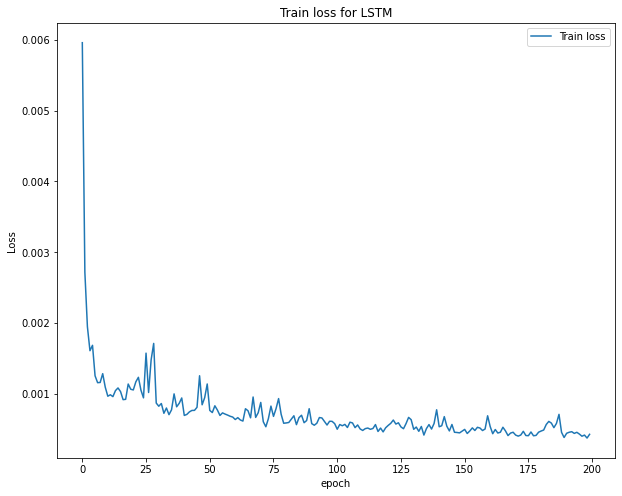

In [12]:
# Flot train loss and validation loss
def plot_loss (record,model_name):
    plt.figure(figsize = (10,8))
    plt.plot(record.history['loss'])
    #plt.plot(record.history['val_loss'])
    plt.title('Train loss for '+ model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss','Validation Loss'], loc='upper right')
    
#plot_loss(BidirecLSTM_record,'Bidirectional_LSTM')
plot_loss(LSTM_record,'LSTM')

In [13]:
# Make Prediction
def predict(model):
    prediction = model.predict(X_test)
    prediction = scaler_y_test.inverse_transform(prediction)
    return prediction

prediction_of_LSTM = predict(LSTM_model)
prediction_of_LSTM.shape

(311, 1)

In [14]:
Y_test_read = scaler_y_test.inverse_transform(Y_test) 
Y_train_read = scaler_y.inverse_transform(Y_train)

print("Actual Value\n")
print(Y_test_read)
print("\nPrediction\n")
print(prediction_of_LSTM)

Actual Value

[[125.857498]
 [124.824997]
 [126.522499]
 [125.010002]
 [124.807503]
 [129.039993]
 [134.179993]
 [131.399994]
 [120.879997]
 [120.959999]
 [112.82    ]
 [117.32    ]
 [113.489998]
 [112.      ]
 [115.360001]
 [115.540001]
 [112.129997]
 [110.339996]
 [106.839996]
 [110.080002]
 [111.809998]
 [107.120003]
 [108.220001]
 [112.279999]
 [114.959999]
 [114.089996]
 [115.809998]
 [116.790001]
 [113.019997]
 [116.5     ]
 [113.160004]
 [115.080002]
 [114.970001]
 [116.970001]
 [124.400002]
 [121.099998]
 [121.190002]
 [120.709999]
 [119.019997]
 [115.980003]
 [117.510002]
 [116.870003]
 [115.75    ]
 [115.040001]
 [115.050003]
 [116.599998]
 [111.199997]
 [115.32    ]
 [108.860001]
 [108.769997]
 [110.440002]
 [114.949997]
 [119.029999]
 [118.690002]
 [116.32    ]
 [115.970001]
 [119.489998]
 [119.209999]
 [119.260002]
 [120.300003]
 [119.389999]
 [118.029999]
 [118.639999]
 [117.339996]
 [113.849998]
 [115.169998]
 [116.029999]
 [116.589996]
 [119.050003]
 [122.720001]
 [123.

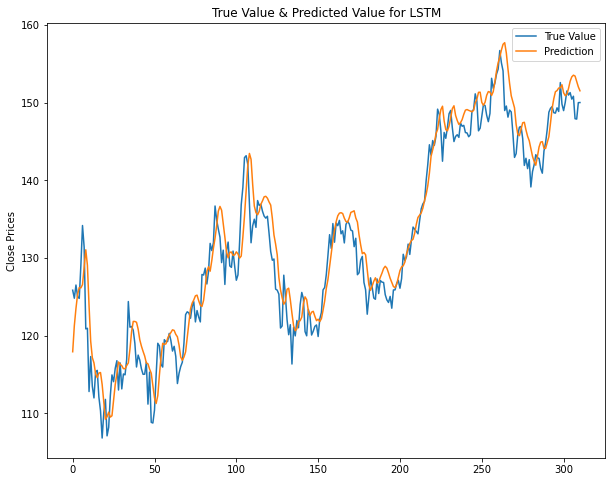

In [15]:
# Plot true future vs prediction
def plot_result(prediction, y_test, model_name):
    plt.figure(figsize = (10,8))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='True Value')
    plt.plot(np.arange(range_future), np.array(prediction), label='Prediction')
    plt.legend(loc='upper right')
    plt.title('True Value & Predicted Value for '+ model_name)
    plt.ylabel('Close Prices')
    
#plot_result(prediction_of_BidirectionLSTM, Y_test_read, 'BidirectionLSTM')
plot_result(prediction_of_LSTM, Y_test_read, 'LSTM')

In [16]:
import sklearn.metrics as sklm
import math

def print_metrics(y_true, y_predicted, year, model):
    print("This prediction model is: " + model)
    print("The size of dataset is: " + year)
    print('+-----------------------------+--------+')
    print('Mean Square Error (MSE)       = {:.4f}'.format(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error (RMSE) = {:.4f}'.format(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error (MAE)     = {:.4f}'.format(sklm.mean_absolute_error(y_true, y_predicted)))
    print('+-----------------------------+--------+')
    
    
print_metrics(Y_test_read, prediction_of_LSTM, "5-year",'Multivariate LSTM') 

This prediction model is: Multivariate LSTM
The size of dataset is: 3-year
+-----------------------------+--------+
Mean Square Error (MSE)       = 10.4968
Root Mean Square Error (RMSE) = 3.2399
Mean Absolute Error (MAE)     = 2.5019
+-----------------------------+--------+
